# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Travis Zusa Zuve Saputra
- **Email:** traviszusa123@gmail.com
- **ID Dicoding:** traviszusa

## Menentukan Pertanyaan Bisnis

- Dalam kondisi cuaca apa rata-rata penyewaan sepeda paling tinggi?
- Pada musim apa penyewaan sepeda rata-rata paling sering terjadi?
- Bagaimana tren total penyewaan sepeda berubah setiap bulan selama tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('./data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('./data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataframe yang digunakan hanya dataframe `day_df` karena tidak memerlukan analisis per jamnya (`hour_df`) untuk menjawab pertanyaan yang telah ditentukan

### Assessing Data

#### Menilai tabel `day_df`

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Pada `day_df` terdapat kolom dengan tipe data berupa `object`, yaitu pada kolom `dteday` yang harus dilakukan perubahan tipe data menjadi `datetime` (Hal ini dapat tidak dilakukan karena kolom tersebut tidak dibutuhkan untuk menjawab pertanyaan yang telah ditentukan sebelumnya)
- Tidak terdapat data yang kosong maupun data terduplikat pada `day_df`

### Cleaning Data

#### Membersihkan tabel `day_df`

##### Drop Column

In [8]:
# Menghapus beberapa kolom karena tidak diperlukan
day_df = day_df.drop(['instant', 'dteday', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered'], axis=1)

##### Rename Column

In [9]:
# Mengganti nama kolom pada tabel day_df
day_df = day_df.rename(columns={'yr': 'year',
                                'mnth': 'month',
                                'weathersit': 'weather',
                                'cnt': 'total_rental'})

##### Convert Data Value

In [10]:
# Mengganti nilai pada data agar lebih mudah dibaca
day_df['year'] = day_df['year'].replace({0: '2011', 1: '2012'})
day_df['month'] = day_df['month'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
day_df['season'] = day_df['season'].replace({1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
day_df['weather'] = day_df['weather'].replace({1: 'Clear', 2: 'Mist_Cloudy', 3: 'Light_Rain', 4: 'Heavy_Rain'})

In [11]:
# Cek kembali data
day_df.head()

,season,year,month,weather,total_rental
0,Springer,2011,January,Mist_Cloudy,985
1,Springer,2011,January,Mist_Cloudy,801
2,Springer,2011,January,Clear,1349
3,Springer,2011,January,Clear,1562
4,Springer,2011,January,Clear,1600


**Insight:**
- Penggantian tipe data pada `day_df` kolom `dteday` yang semula `object` menjadi `datetime` tidak dilakukan karena tidak digunakan.
- Hanya membutuhkan kolom pada dataframe `day_df` sebagai berikut untuk menjawab pertanyaan yang telah ditentukan (sehingga sisanya dihapus),
    - cuaca (`weather`)
    - musim (`season`)
    - bulan (`mnth`)
    - tahun (`yr`)
    - total rental (`cnt`)

## Exploratory Data Analysis (EDA)

### Explore day_df

In [12]:
# Menampilkan deskripsi data secara menyeluruh
day_df.describe(include='all')

,season,year,month,weather,total_rental
count,731,731,731,731,731.000000
unique,4,2,12,3,NaN
top,Fall,2012,January,Clear,NaN
freq,188,366,62,463,NaN
mean,NaN,NaN,NaN,NaN,4504.348837
std,NaN,NaN,NaN,NaN,1937.211452
min,NaN,NaN,NaN,NaN,22.000000
25%,NaN,NaN,NaN,NaN,3152.000000
50%,NaN,NaN,NaN,NaN,4548.000000
75%,NaN,NaN,NaN,NaN,5956.000000


In [13]:
# Menampilkan jumlah penyewa sepeda berdasarkan musim
day_df.groupby('season')['total_rental'].sum().reset_index()

,season,total_rental
0,Fall,1061129
1,Springer,471348
2,Summer,918589
3,Winter,841613


In [14]:
# Menampilkan jumlah penyewa sepeda berdasarkan cuaca
day_df.groupby('weather')['total_rental'].sum().reset_index()

,weather,total_rental
0,Clear,2257952
1,Light_Rain,37869
2,Mist_Cloudy,996858


**Insight:** 
- Dari statistik di atas dapat dilihat jika mayoritas melakukan penyewaan pada musim `Fall` dengan `total_rental` sejumlah 1051129
- Dari statistik di atas dapat dilihat jika mayoritas melakukan penyewaan pada cuaca `Clear` dengan `total_rental` sejumlah 2257952

## Visualization & Explanatory Analysis

### Pertanyaan 1: Dalam kondisi cuaca apa rata-rata penyewaan sepeda paling tinggi?

  weather  avg_rental
0   Clear     4876.79


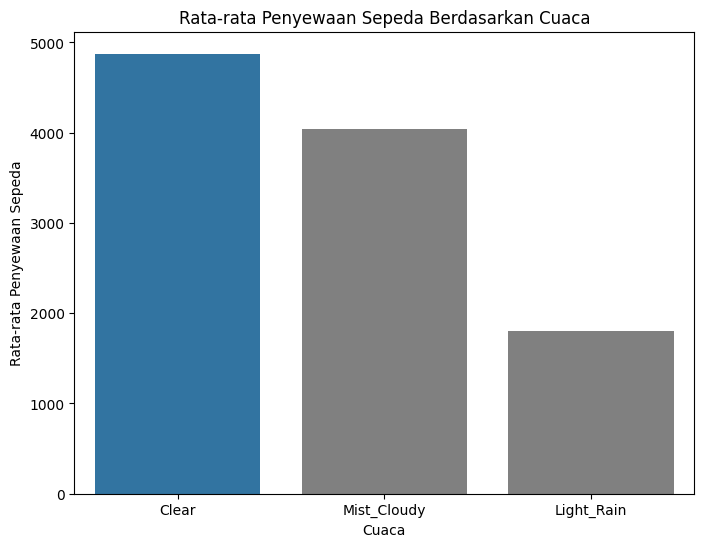

In [15]:
# Menghitung rata-rata penyewaan sepeda berdasarkan kondisi cuaca
rata_rata = day_df.groupby('weather')['total_rental'].mean().sort_values(ascending=False).reset_index()
rata_rata.rename(columns={'total_rental': 'avg_rental'}, inplace=True)
rata_rata['avg_rental'] = rata_rata['avg_rental'].round(2)
print(rata_rata.head(1))

# Menampilkan plot
plt.figure(figsize=(8, 6))
sns.barplot(x='weather', y='avg_rental', data=rata_rata, hue='weather', palette=['#1F77B4', '#808080', '#808080'], dodge=False, legend=False)
plt.xlabel('Cuaca')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Cuaca')
plt.show()

**Insight:** Dapat dilihat pada grafik di atas, bahwa rata-rata penyewaan tertinggi pada kondisi cuaca `Clear` dengan rata-rata sebesar 4876.79 penyewa

### Pertanyaan 2: Pada musim apa penyewaan sepeda rata-rata paling sering terjadi?

  season  avg_rental
0   Fall      5644.3


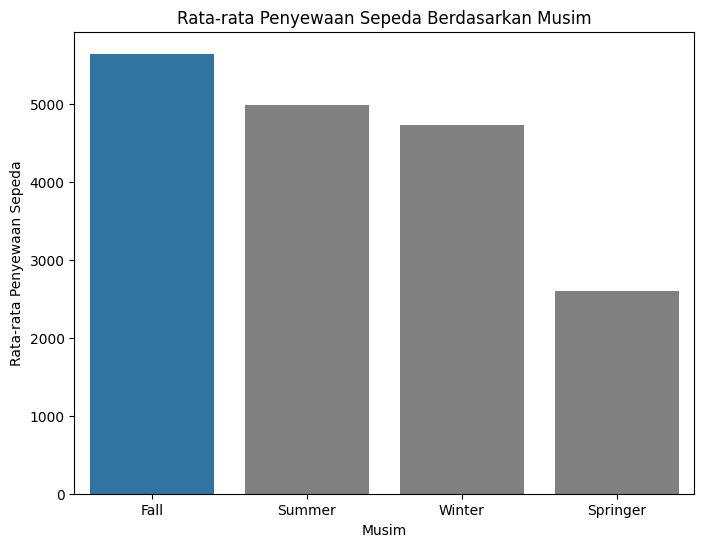

In [16]:
# Menghitung rata-rata penyewaan sepeda berdasarkan musim
rata_rata = day_df.groupby('season')['total_rental'].mean().sort_values(ascending=False).reset_index()
rata_rata.rename(columns={'total_rental': 'avg_rental'}, inplace=True)
rata_rata['avg_rental'] = rata_rata['avg_rental'].round(2)
print(rata_rata.head(1))

# Menampilkan plot
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='avg_rental', data=rata_rata, hue='season', palette=['#1F77B4', '#808080', '#808080', '#808080'], dodge=False, legend=False)
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
plt.show()

**Insight:** Dapat dilihat pada grafik di atas, bahwa rata-rata penyewaan tertinggi pada musim `Fall` atau Gugur dengan rata-rata sebesar 5644.3 penyewa

### Pertanyaan 3: Bagaimana tren total penyewaan sepeda berubah setiap bulan selama tahun 2011 dan 2012?

          index       6
0          year    2011
1         month    June
2  total_rental  143512
          index         23
0          year       2012
1         month  September
2  total_rental     218573


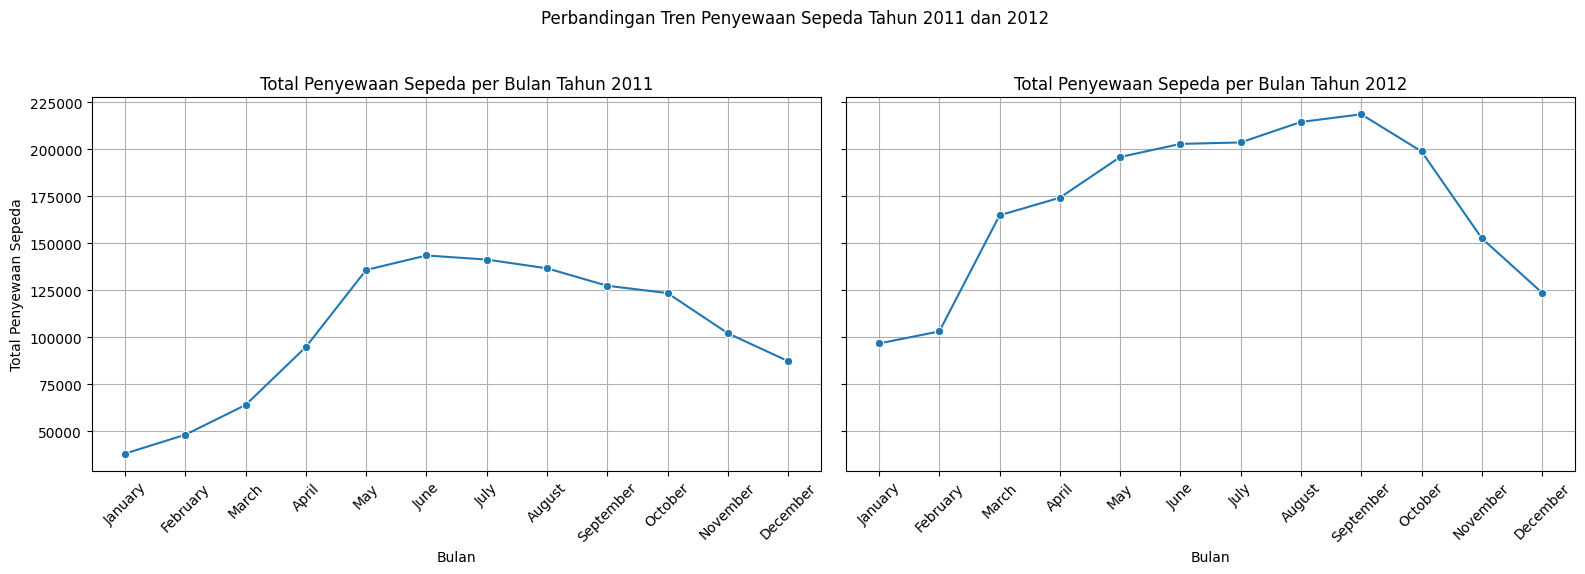

In [17]:
# Agregasi data untuk mendapatkan total penyewaan sepeda per bulan setiap tahun
monthly_trend = day_df.groupby(['year', 'month'])['total_rental'].sum().reset_index()

# Mengurutkan DataFrame berdasarkan tahun dan urutan bulan
month_order = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]
monthly_trend['month'] = pd.Categorical(monthly_trend['month'], categories=month_order, ordered=True)
monthly_trend = monthly_trend.sort_values(['year', 'month'])

# Membagi data berdasarkan tahun
data_2011 = monthly_trend[monthly_trend['year'] == '2011']
data_2012 = monthly_trend[monthly_trend['year'] == '2012']
print(data_2011.loc[data_2011['total_rental'].idxmax()].reset_index())
print(data_2012.loc[data_2012['total_rental'].idxmax()].reset_index())

# Membuat subplot untuk dua grafik berdampingan
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot untuk tahun 2011
sns.lineplot(x='month', y='total_rental', data=data_2011, marker='o', ax=axes[0])
axes[0].set_title('Total Penyewaan Sepeda per Bulan Tahun 2011')
axes[0].set_xlabel('Bulan')
axes[0].set_ylabel('Total Penyewaan Sepeda')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Plot untuk tahun 2012
sns.lineplot(x='month', y='total_rental', data=data_2012, marker='o', ax=axes[1])
axes[1].set_title('Total Penyewaan Sepeda per Bulan Tahun 2012')
axes[1].set_xlabel('Bulan')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

plt.suptitle('Perbandingan Tren Penyewaan Sepeda Tahun 2011 dan 2012')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Insight:** 
- Pada tahun 2011, terdapat kenaikan signifikan dari bulan `Januari` hingga mencapai titik tertinggi pada bulan `Juni`, yaitu sejumlah 143512 penyewaan pada bulan `Juni`
- Pada tahun 2012, terdapat kenaikan signifikan dari bulan `Januari` hingga mencapai titik tertinggi pada bulan `September`, yaitu sejumlah 218573 penyewaan pada bulan `September`

## Conclusion

- Pertanyaan 1: Dalam kondisi cuaca apa rata-rata penyewaan sepeda paling tinggi?
<br /> Conclusion: Kondisi cuaca dengan rata-rata penyewaan sepeda paling tinggi adalah kondisi `Clear` dengan rata-rata sebesar 4876.79 penyewaan
    
- Pertanyaan 2: Pada musim apa penyewaan sepeda rata-rata paling sering terjadi?
<br /> Conclusion: Musim dengan penyewaan sepeda rata-rata paling sering terjadi adalah pada musim `Fall` atau Gugur dengan rata-rata sebesar 5644.3 penyewaan
- Pertanyaan 3: Bagaimana tren total penyewaan sepeda berubah setiap bulan selama tahun 2011 dan 2012?
<br /> Conclusion:
    - Pada tahun 2011, terdapat kenaikan signifikan dari bulan `Januari` hingga mencapai titik tertinggi pada bulan `Juni`, yaitu sejumlah 143512 penyewaan pada bulan `Juni`
    - Pada tahun 2012, terdapat kenaikan signifikan dari bulan `Januari` hingga mencapai titik tertinggi pada bulan `September`, yaitu sejumlah 218573 penyewaan pada bulan `September`